# Library Imports

In [130]:
pip install distfit

In [131]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from distfit import distfit
import statistics as sts

Exploring Binomial Data Generation

In [132]:
# explore the binomial data generation
np.random.seed(123)
first_list = []
for i in range(100000):
  successes = np.random.binomial(1, 0.02, 30)
  first_list.append(sum(successes))

counts = Counter(first_list)

sorted_counts = counts.most_common()

# Print counts and values
for value, count in sorted_counts:
    print(f"Value: {value}, Count: {count}")



Value: 0, Count: 54652
Value: 1, Count: 33374
Value: 2, Count: 9770
Value: 3, Count: 1908
Value: 4, Count: 263
Value: 5, Count: 32
Value: 6, Count: 1


In [133]:
# method 2 for exploring binomial data generation
np.random.seed(999999999)
second_list = np.random.binomial(30, 0.02, 100000)

counts = Counter(second_list)

sorted_counts = counts.most_common()

# Print counts and values
for value, count in sorted_counts:
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 54546
Value: 1, Count: 33525
Value: 2, Count: 9701
Value: 3, Count: 1952
Value: 4, Count: 243
Value: 5, Count: 32
Value: 6, Count: 1


# Base Case Simulation

In [134]:
'''
For the first case where there is a 0 percent chance of someone being immunized beforehand
1) Define a simulation
2) run the simulation n times

keep track of for future updates:
1) newly infected: 3 days later we need to remove that number from total infected by updating number cured
2)
'''

# define the simulation
def simulate_pandemic(seed):

  # set initial values and params, edit as needed
  total_students = 31
  p_infected = 0.02
  num_infected_start = [1]
  num_infected_new = []
  num_no_longer_infected_new = [0, 0]
  total_num_no_longer_infected = [0, 0]
  day = 0
  days_infected = 3
  can_get_reinfected = False
  probably_immunized = False
  can_get_infected = True
  num_possible_to_infect = [total_students - num_infected_start[0]]


  # end when no one can be infected
  while num_infected_start[-1] != 0:

    day += 1
    # print(day)

    # update the seed
    seed += day
    np.random.seed(seed)



    # how many are infected to begin with today
    if day > 1:
      num_infected_start.append(num_infected_start[day - 2] + num_infected_new[day - 2] - num_no_longer_infected_new[day - 2])
      # print('num_infected_start')
      # print(num_infected_start)

      # determine who we can infect
      num_possible_to_infect.append(total_students - num_infected_start[day - 1] - total_num_no_longer_infected[day - 2])
      # print('num_possible_to_infect')
      # print(num_possible_to_infect)


    # run this portion during the weekdays
    if 1 <= day % 7 <= 5:

      # infect some new students, muahahahaha
      if num_infected_start[day - 1] < 0:
        print('num_infected_start')
        print(num_infected_start)
        print('num_possible_to_infect')
        print(num_possible_to_infect)
        print('num_infected_new')
        print(num_infected_new)
        print('num_no_longer_infected_new')
        print(num_no_longer_infected_new)
        print('total_num_no_longer_infected')
        print(total_num_no_longer_infected)

      if num_possible_to_infect[day - 1] < 0:
        print('num_infected_start')
        print(num_infected_start)
        print('num_possible_to_infect')
        print(num_possible_to_infect)
        print('num_infected_new')
        print(num_infected_new)
        print('num_no_longer_infected_new')
        print(num_no_longer_infected_new)
        print('total_num_no_longer_infected')
        print(total_num_no_longer_infected)

        print(seed)

      new_infected = np.sum(np.random.binomial(num_infected_start[day - 1], p_infected, num_possible_to_infect[day - 1]) == 1)
      num_infected_new.append(new_infected)
      # print('num_infected_new')
      # print(num_infected_new)


    # run this portion during the weekends
    else:
      num_infected_new.append(0)
      # print('num_infected_new')
      # print(num_infected_new)

    # determine the number no longer infected and update the totals
    if day > 2:
      if day == 3:
        num_no_longer_infected_new.append(num_infected_start[day - 3])
      else:
        num_no_longer_infected_new.append(num_infected_new[day - 4])

      # print('num_no_longer_infected_new')
      # print(num_no_longer_infected_new)

      total_num_no_longer_infected.append(total_num_no_longer_infected[day - 2] + num_no_longer_infected_new[day - 1])
      # print('total_num_no_longer_infected')
      # print(total_num_no_longer_infected)


  return day - 1, num_infected_start, num_infected_new

In [135]:
# single run of the above function
simulate_pandemic(5555)


(8, [1, 1, 1, 1, 1, 2, 1, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0])

In [136]:
# run the simulation n times and return outcome
from matplotlib import pyplot as plt


n = 100000
pandemic_length = []
second_day_list = []
first_day_list = []
second_day_total = []
infected_totals = []


for i in range(n):
  seed = i+1234567+1
  run_i = simulate_pandemic(seed)

  pandemic_length.append(run_i[0])
  second_day_list.append(run_i[2][1])
  first_day_list.append(run_i[2][0])
  second_day_total.append(run_i[1][2])
  infected_totals.append(run_i[1])







Text(0.5, 1.0, 'Total Students Infected on Day 1')

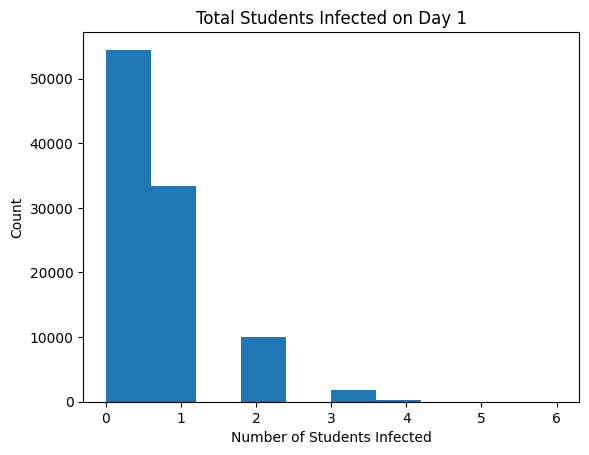

In [137]:
# first day expected number newly infected

plt.hist(first_day_list)

# plt.hist(second_day_total)
plt.xlabel('Number of Students Infected')
plt.ylabel('Count')
plt.title('Total Students Infected on Day 1')


In [138]:
counts_day_2_end = Counter(second_day_total)

counts_day_1 = Counter(first_day_list)


print(round(sts.mean(map(float, first_day_list)),2))
print(counts_day_1)

0.6
Counter({0: 54452, 1: 33329, 2: 10029, 3: 1880, 4: 279, 5: 29, 6: 2})


0.92
Counter({0: 42172, 1: 34442, 2: 15759, 3: 5491, 4: 1598, 5: 422, 6: 98, 7: 14, 9: 2, 8: 2})


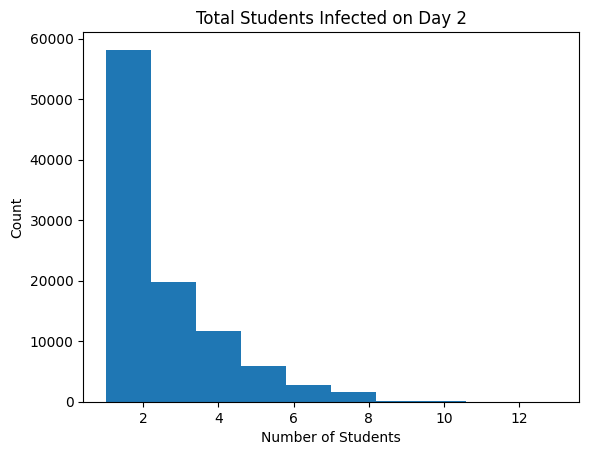

In [139]:
# second day expected number newly infected

#plt.hist(second_day_list)

plt.hist(second_day_total)
plt.xlabel('Number of Students')
plt.ylabel('Count')
plt.title('Total Students Infected on Day 2')
counts_day_2_end = Counter(second_day_total)

counts_day_2 = Counter(second_day_list)


print(round(sts.mean(map(float, second_day_list)),2))
print(counts_day_2)

2.52
Counter({1: 29731, 2: 28442, 3: 19737, 4: 11616, 5: 5959, 6: 2701, 7: 1146, 8: 458, 9: 151, 10: 39, 11: 12, 12: 7, 13: 1})


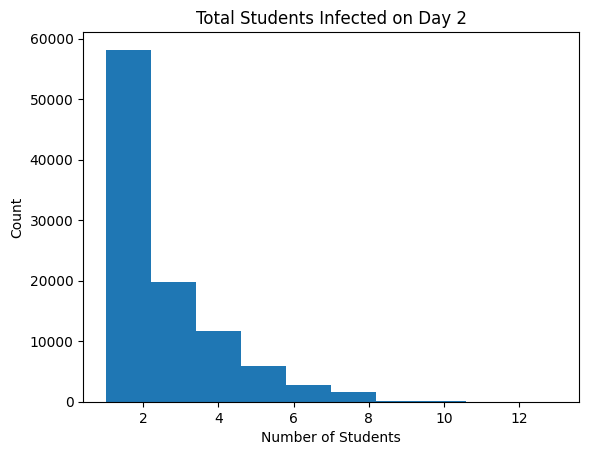

In [140]:
# total infected day 2 (start of day 3)

plt.hist(second_day_total)
plt.xlabel('Number of Students')
plt.ylabel('Count')
plt.title('Total Students Infected on Day 2')
counts_day_2_end = Counter(second_day_total)


print(round(sts.mean(map(float, second_day_total)),2))
print(counts_day_2_end)

The average length of the pandemic without immunizations is: 9.3
Value: 8, Count: 27165
Value: 3, Count: 16294
Value: 15, Count: 10413
Value: 7, Count: 8885
Value: 14, Count: 8420
Value: 11, Count: 7816
Value: 6, Count: 6035
Value: 13, Count: 3117
Value: 5, Count: 2327
Value: 18, Count: 2195
Value: 4, Count: 1934
Value: 12, Count: 1413
Value: 21, Count: 1382
Value: 22, Count: 1174
Value: 20, Count: 633
Value: 19, Count: 338
Value: 25, Count: 205
Value: 28, Count: 96
Value: 29, Count: 62
Value: 27, Count: 44
Value: 26, Count: 29
Value: 32, Count: 10
Value: 35, Count: 5
Value: 34, Count: 4
Value: 36, Count: 3
Value: 41, Count: 1


Text(0.5, 1.0, 'School Day of Pandemic End')

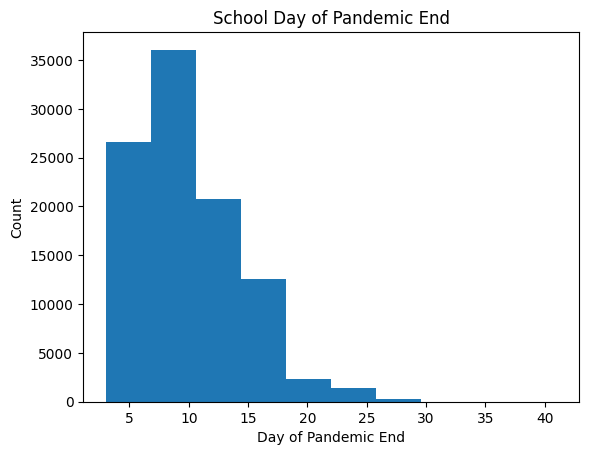

In [141]:
# expected length of the pandemic: 3 days means Timmy infected no one and was himself cured after 3 days

pand_len = round(np.average(pandemic_length),1)

print('The average length of the pandemic without immunizations is:',pand_len)

plt.hist(pandemic_length)

counts = Counter(pandemic_length)

sorted_counts = counts.most_common(100)

# Print counts and values
for value, count in sorted_counts:
   print(f"Value: {value}, Count: {count}")

plt.xlabel('Day of Pandemic End')
plt.ylabel('Count')
plt.title('School Day of Pandemic End')

In [142]:
# define function to find longest sublist in list of lists



def FindMaxLength(lst):
    maxList = max(lst, key=len)
    maxLength = len(maxList)

    return maxList, maxLength

longest_list = FindMaxLength(infected_totals)

long_len = longest_list[1]

print(longest_list)

([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 4, 3, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0], 42)


In [143]:
# fill in 0s for all sublists to reach the length of the longest sublist

for row in infected_totals:
    while len(row) < long_len:
        row.append(0)

print(infected_totals[:3])

[[1, 1, 4, 4, 5, 4, 3, 2, 3, 6, 7, 10, 8, 7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 4, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 4, 6, 6, 7, 7, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


0     1.00000
1     1.60300
2     2.51955
3     2.85228
4     3.58893
5     4.16992
6     2.83719
7     1.49754
8     0.59342
9     0.81649
10    1.11076
11    0.88382
12    0.93084
13    0.63657
14    0.27009
15    0.08013
16    0.10373
17    0.13281
18    0.08856
19    0.08706
20    0.05798
21    0.02210
22    0.00537
23    0.00672
24    0.00817
25    0.00469
26    0.00434
27    0.00289
28    0.00100
29    0.00026
30    0.00029
31    0.00036
32    0.00018
33    0.00019
34    0.00012
35    0.00004
36    0.00001
37    0.00001
38    0.00002
39    0.00001
40    0.00001
41    0.00000
dtype: float64


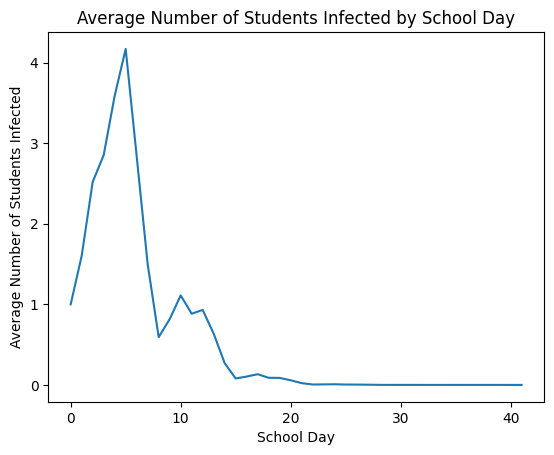

In [144]:
# create list of expected infected on a given day, remember that first index value is day 0

df = pd.DataFrame(infected_totals)

# df.head()

expected_number_infected = df.mean()

print(expected_number_infected)

plt.plot(expected_number_infected)

plt.xlabel('School Day')
plt.ylabel('Average Number of Students Infected')
plt.title('Average Number of Students Infected by School Day')

# Display the plot
plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >DEBUG> (9.27281, 4.791159014674841)
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.01139] [loc=9.273 scale=4.791]
[distfit] >DEBUG> (3.0, 6.27281)
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.983782] [loc=3.000 scale=6.273]
[distfit] >DEBUG> (0.19819047568195483, 2.9846951442544345, 0.015304855745565503)
[distfit] >INFO> [pareto    ] [0.07 sec] [RSS: 0.98232] [loc=2.985 scale=0.015]
[distfit] >DEBUG> (0.6896837323138969, 7.999999999999999, 3.790042166405748)
[distfit] >INFO> [dweibull  ] [3.17 sec] [RSS: 0.734024] [loc=8.000 scale=3.790]
[distfit] >DEBUG> (32.81512516633748, 9.177041758905766, 4.641213983425024)
[distfit] >INFO> [t         ] [5.82 sec] [RSS: 1.01151] [loc=9.177 scale=4.641]
[distfit] >DEBUG> (0.007271409042235029, 7.062049601049226, 3.8379950891697727)
[distfit] >INFO> [genextreme] [2.57 sec] [RSS: 1.00038] [loc=7.062 scale=3.838]
[distfit] >DEBUG> (0.41605540676148384, 2.999999999999999, 7.14125359505088

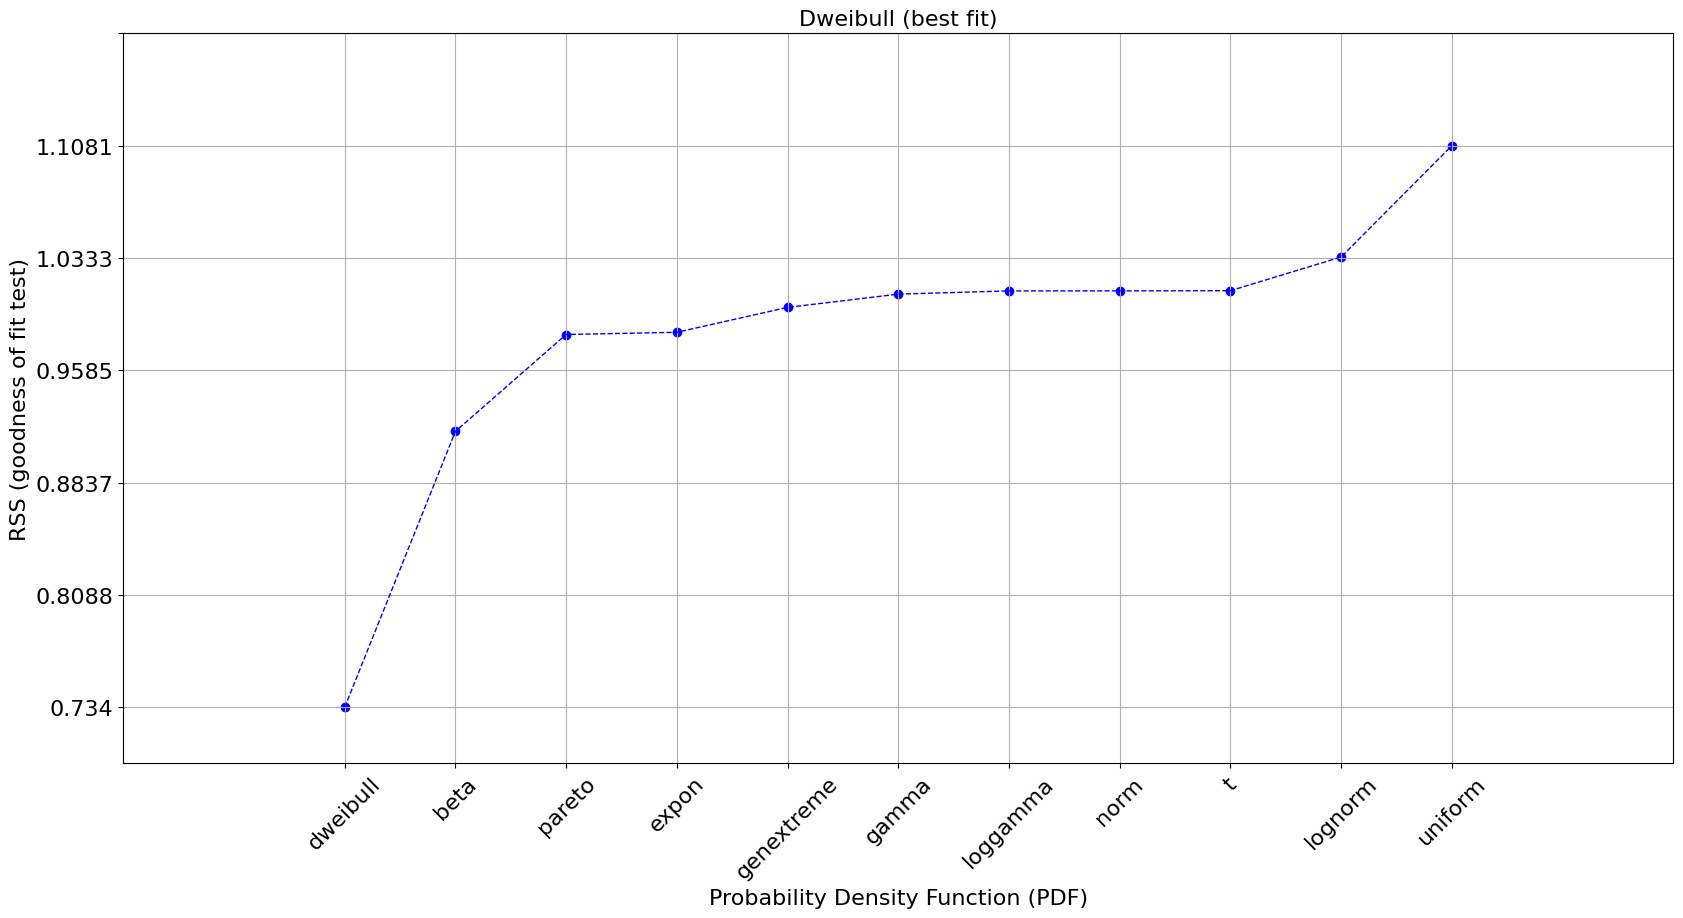

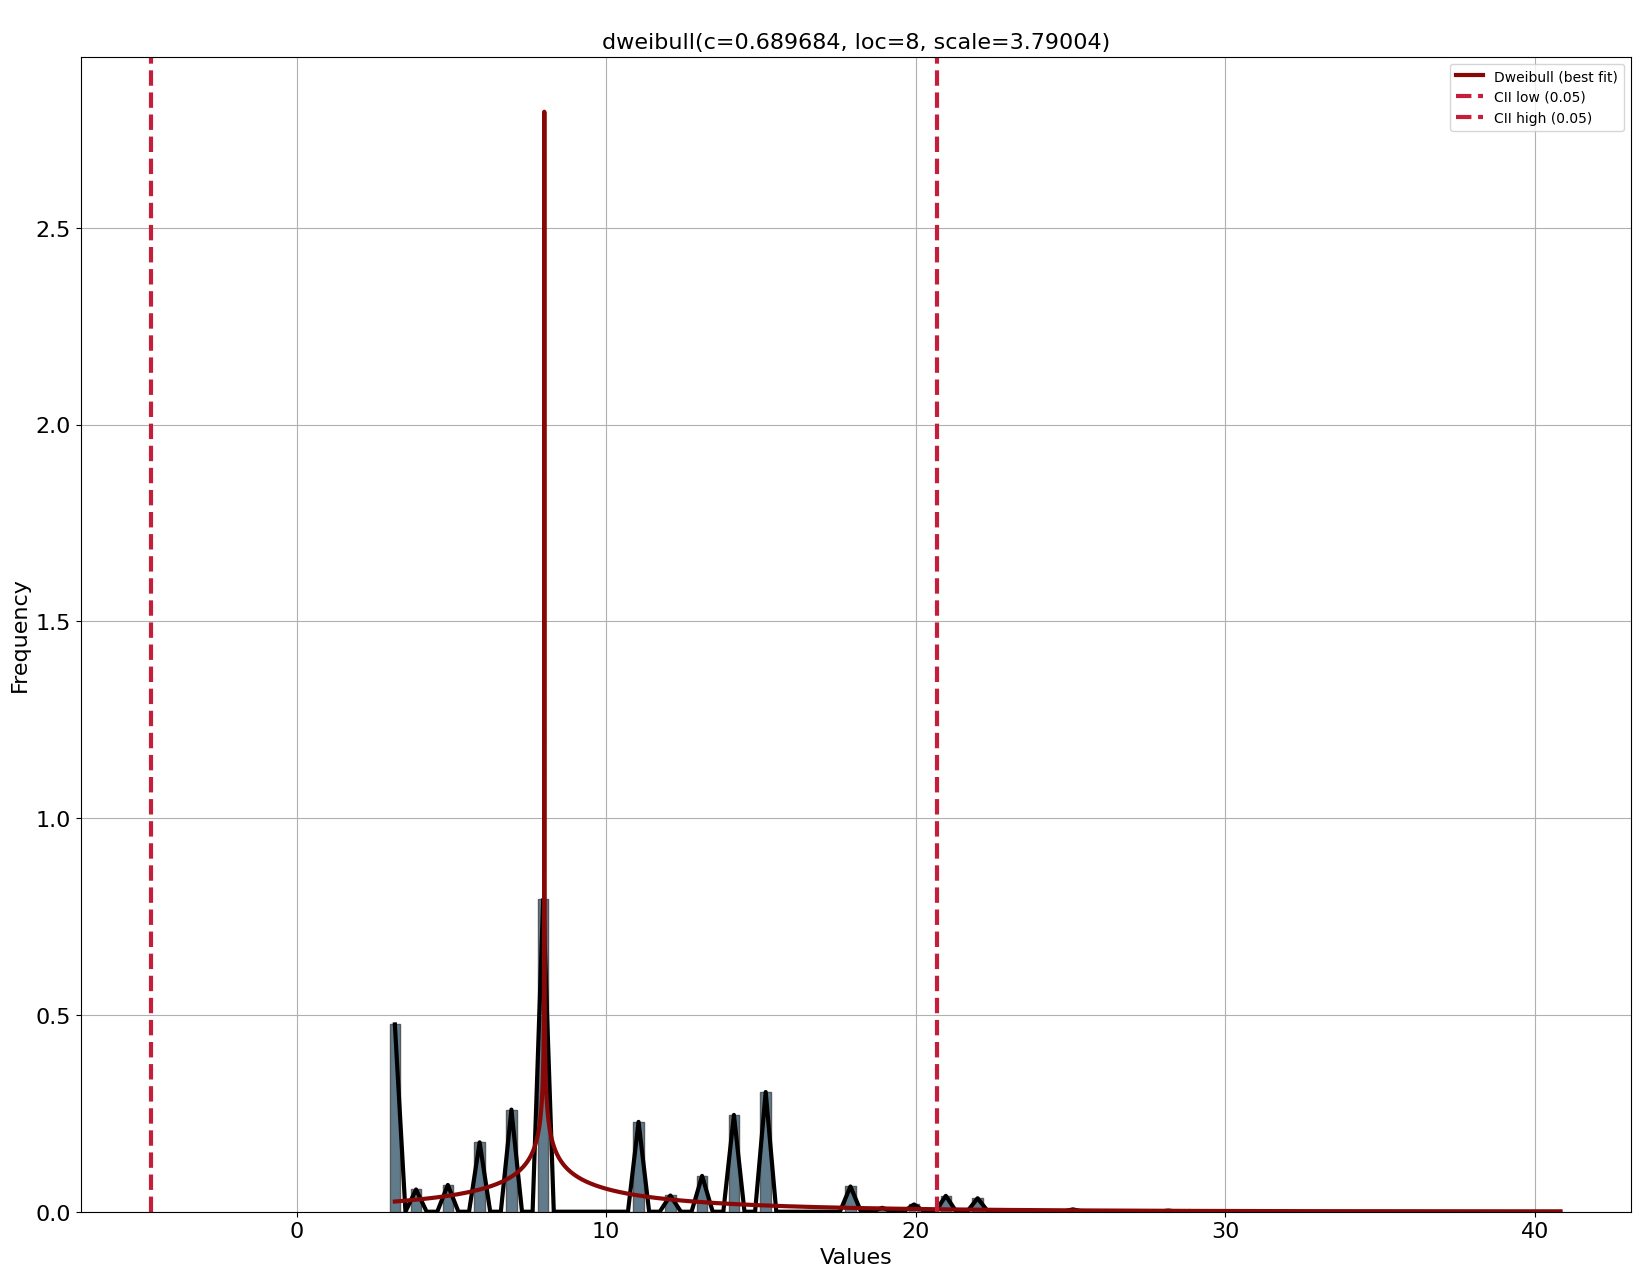

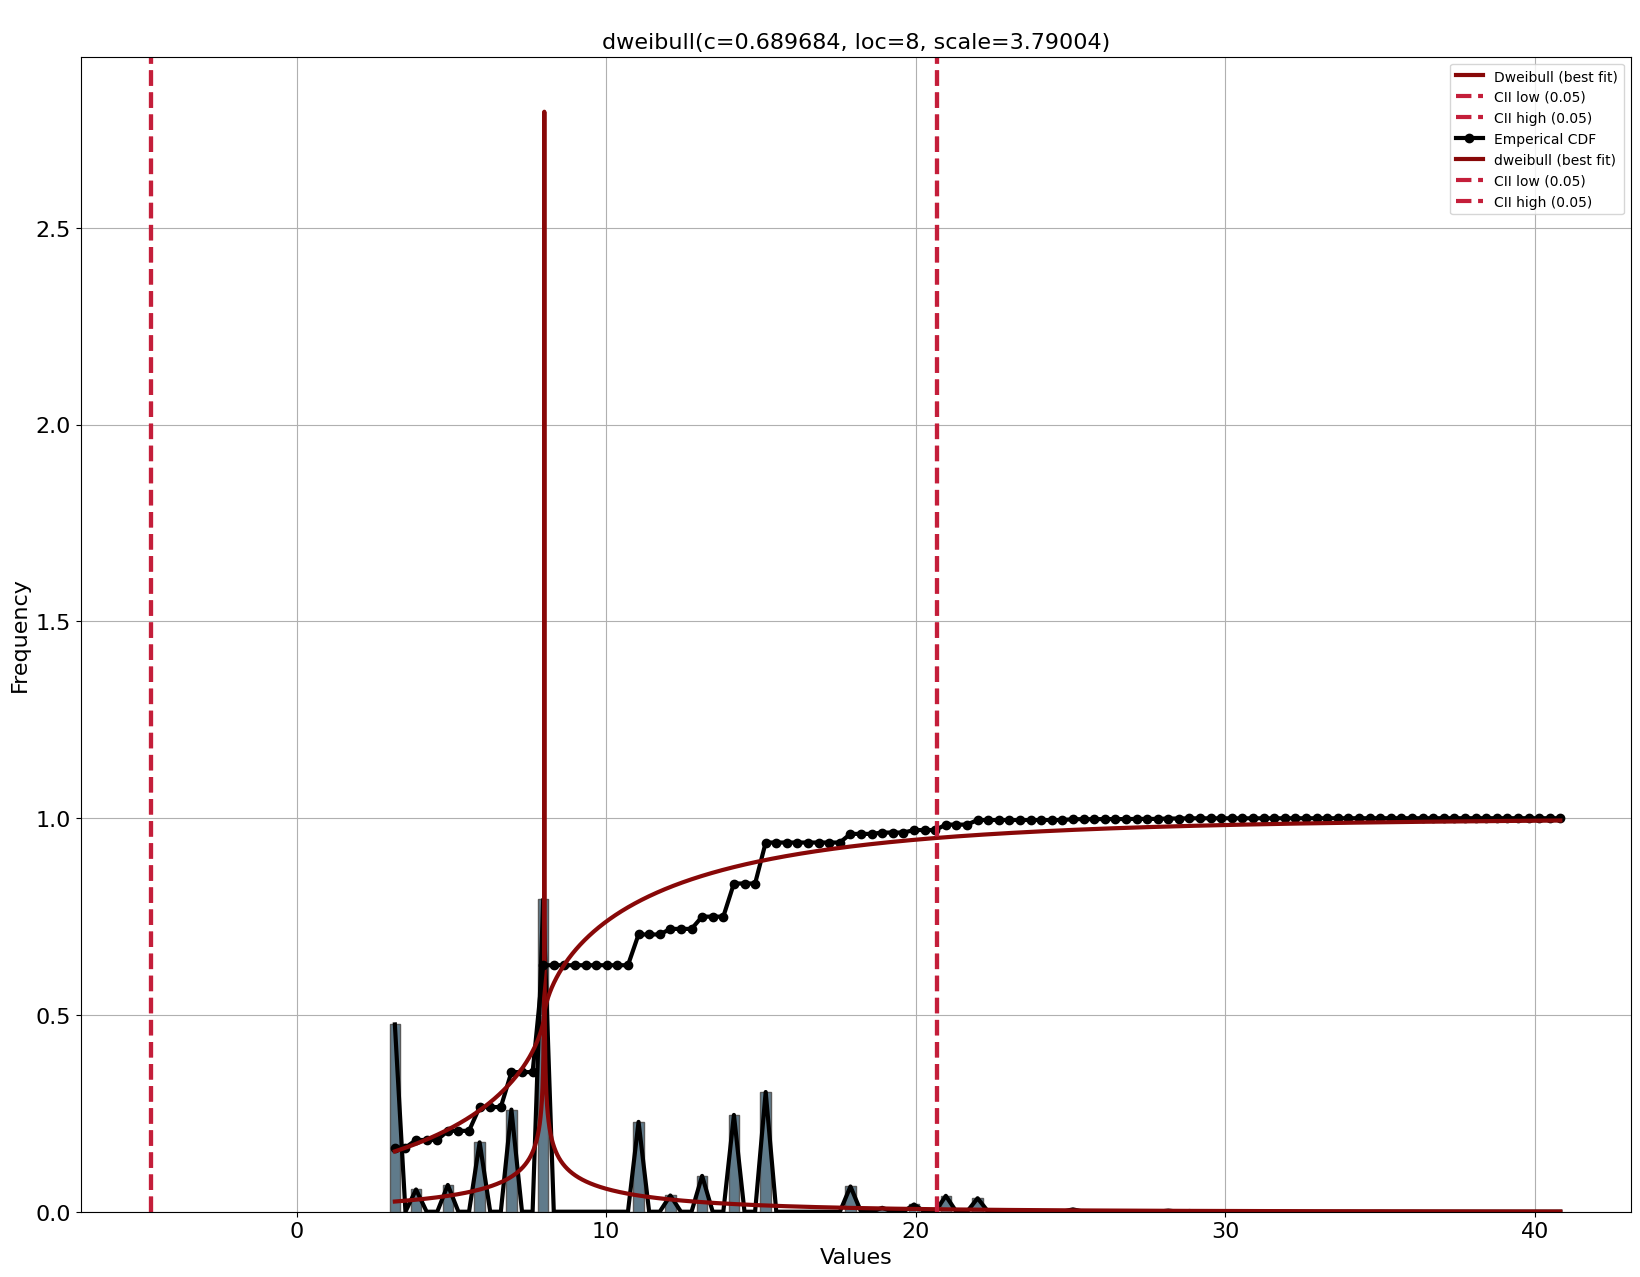

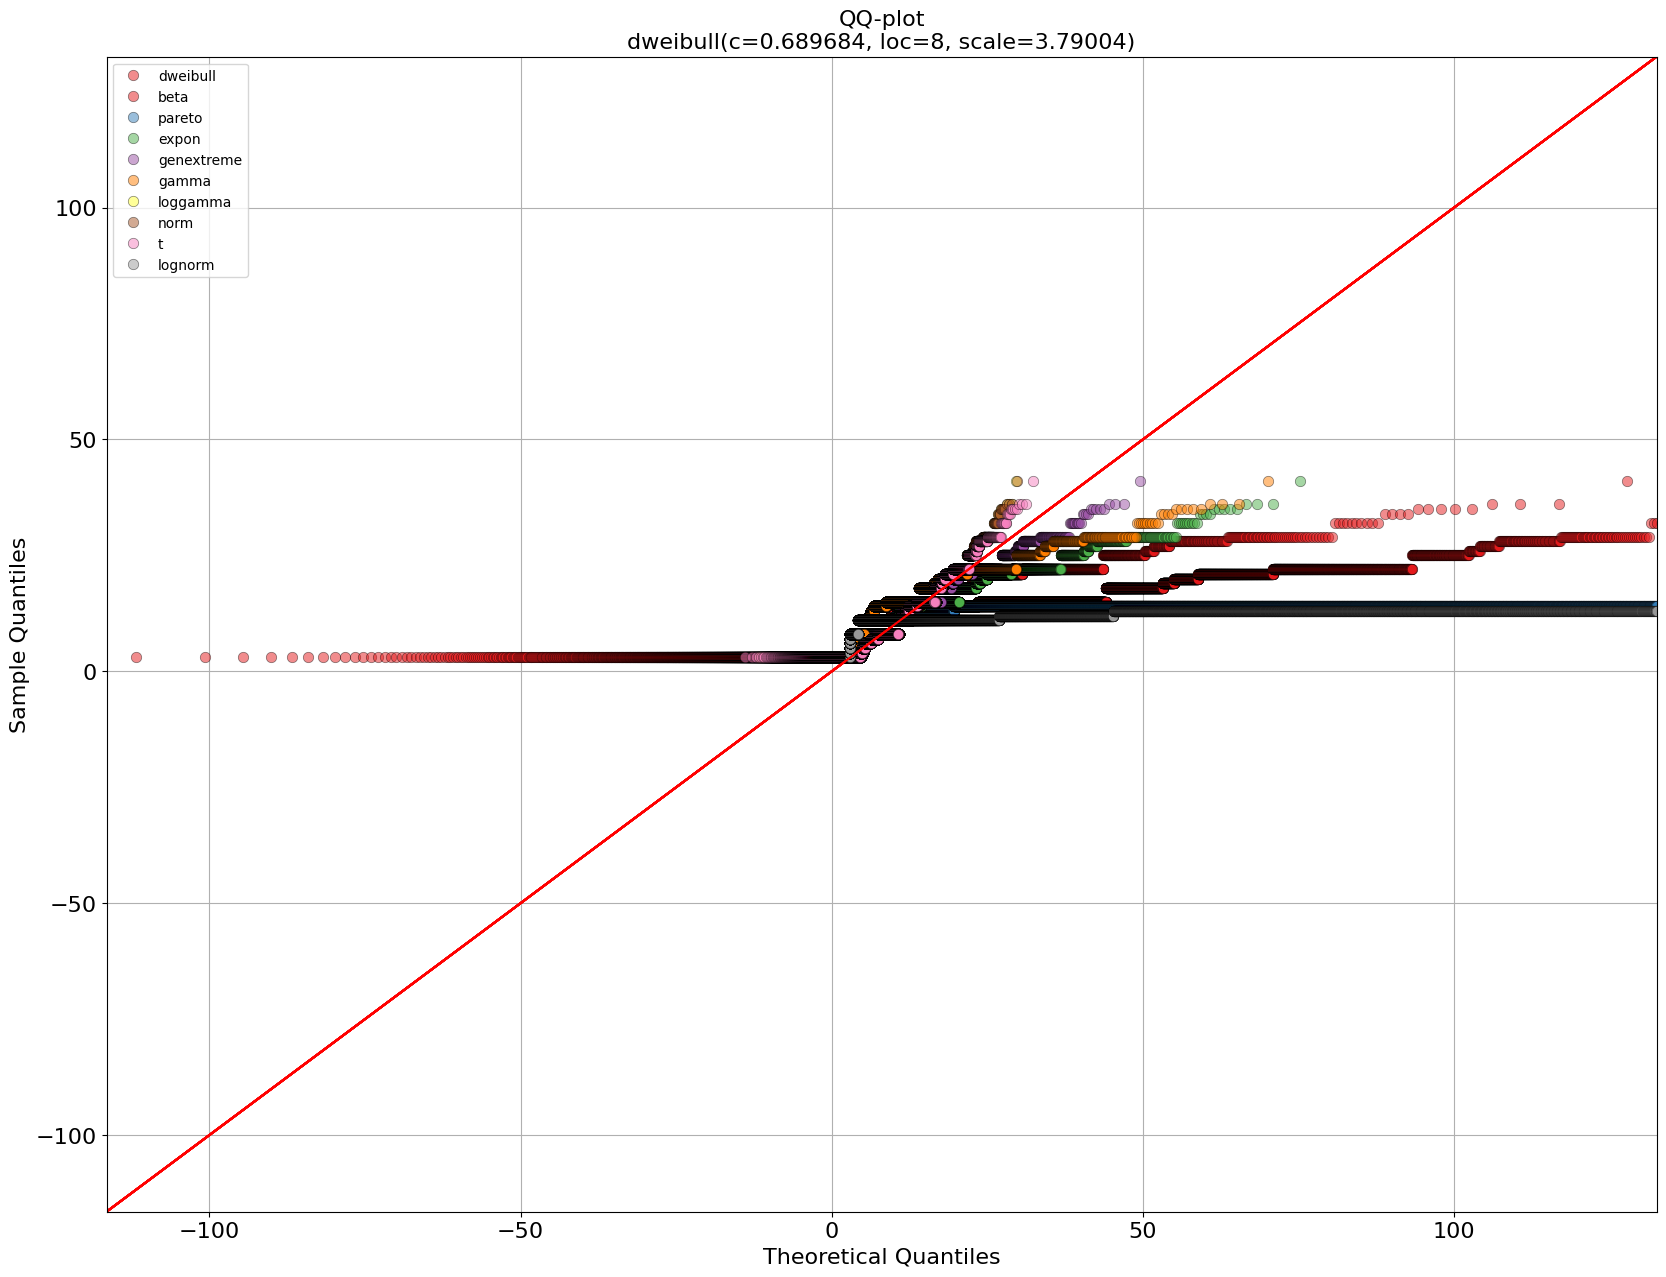

In [145]:
# distfit for 1st case
dfit = distfit()

results = dfit.fit_transform(np.array(pandemic_length), verbose = 1)

# Plot summary
dfit.plot_summary()

# PDF plot
dfit.plot()

# Plot PDF
fig, ax = dfit.plot(chart='pdf')

# Add the CDF to the plot
fig, ax = dfit.plot(chart='cdf', n_top=1, ax=ax)

# QQ-plot for top 10 fitted distributions
fig, ax = dfit.qqplot(np.array(pandemic_length), n_top=10)

# Case 2 Simulation (immunized case)

In [146]:
'''
For the second case where there is a 50 percent chance of someone being immunized beforehand
1) Define a simulation
2) run the simulation n times

keep track of for future updates:
1) newly infected: 3 days later we need to remove that number from total infected by updating number cured
2)
'''

# define the simulation
def simulate_pandemic_immunized(seed):

  # set initial values and params, edit as needed
  total_students = 31
  p_infected = 0.02
  num_infected_start = [1]
  num_infected_new = []
  day = 0
  days_infected = 3
  can_get_reinfected = False
  probability_immunized = 0.5
  can_get_infected = True


  # determine the number of people who are immunized
  num_immunized = np.random.binomial(total_students - num_infected_start[day], probability_immunized)

  num_no_longer_infected_new = [0, 0]
  total_num_no_longer_infected = [num_immunized, num_immunized]
  num_possible_to_infect = [total_students - num_infected_start[day] - num_immunized]


  # end when no one can be infected
  while num_infected_start[-1] != 0:

    day += 1
    # print(day)

    # update the seed
    seed += day
    np.random.seed(seed)



    # how many are infected to begin with today
    if day > 1:
      num_infected_start.append(num_infected_start[day - 2] + num_infected_new[day - 2] - num_no_longer_infected_new[day - 2])
      # print('num_infected_start')
      # print(num_infected_start)

      # determine who we can infect
      num_possible_to_infect.append(total_students - num_infected_start[day - 1] - total_num_no_longer_infected[day - 2])
      # print('num_possible_to_infect')
      # print(num_possible_to_infect)


    # run this portion during the weekdays
    if 1 <= day % 7 <= 5:

      # infect some new students, muahahahaha
      new_infected = np.sum(np.random.binomial(num_infected_start[day - 1], p_infected, num_possible_to_infect[day - 1]) == 1)
      num_infected_new.append(new_infected)
      # print('num_infected_new')
      # print(num_infected_new)


    # run this portion during the weekends
    else:
      num_infected_new.append(0)
      # print('num_infected_new')
      # print(num_infected_new)

    # determine the number no longer infected and update the totals
    if day > 2:
      if day == 3:
        num_no_longer_infected_new.append(num_infected_start[day - 3])
      else:
        num_no_longer_infected_new.append(num_infected_new[day - 4])

      # print('num_no_longer_infected_new')
      # print(num_no_longer_infected_new)

      total_num_no_longer_infected.append(total_num_no_longer_infected[day - 2] + num_no_longer_infected_new[day - 1])
      # print('total_num_no_longer_infected')
      # print(total_num_no_longer_infected)


  return day - 1, num_infected_start, num_infected_new,num_immunized

In [147]:
# run a bunch of times
n = 100000
pandemic_length = []
second_day_list = []
first_day_list = []
second_day_total = []
infected_totals = []
num_immunized_ls = []

for i in range(n):
  seed = i+123456789+1
  run_i = simulate_pandemic_immunized(seed)
  pandemic_length.append(run_i[0])
  second_day_list.append(run_i[2][1])
  first_day_list.append(run_i[2][0])
  second_day_total.append(run_i[1][2])
  infected_totals.append(run_i[1])
  num_immunized_ls.append(run_i[3])



Text(0.5, 0, 'Number of Students Immunized')

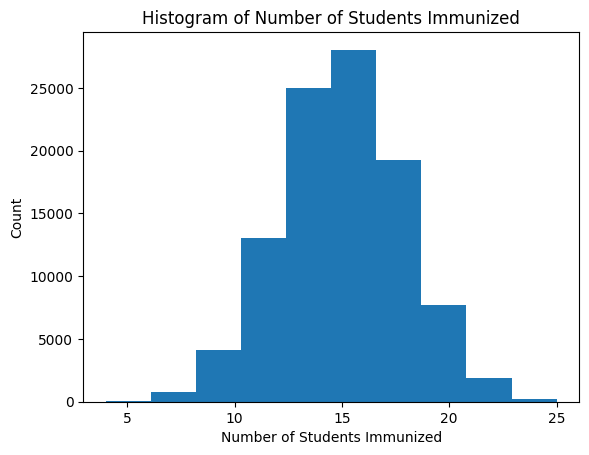

In [148]:
# plot number immunized

plt.hist(num_immunized_ls)
plt.title('Histogram of Number of Students Immunized')
plt.ylabel('Count')
plt.xlabel('Number of Students Immunized')

0.3
Counter({0: 74168, 1: 22256, 2: 3270, 3: 283, 4: 22, 5: 1})


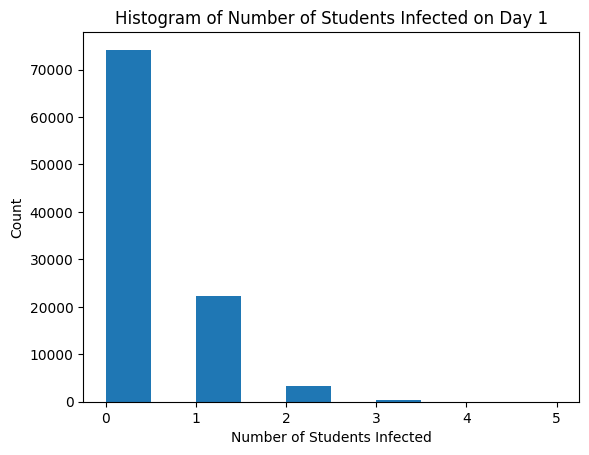

In [149]:
# first day expected number newly infected

plt.hist(first_day_list)
plt.title('Histogram of Number of Students Infected on Day 1')
plt.ylabel('Count')
plt.xlabel('Number of Students Infected')
counts_day_1 = Counter(first_day_list)

print(round(sts.mean(map(float, first_day_list)),2))
print(counts_day_1)


0.37
Counter({0: 69374, 1: 24796, 2: 4958, 3: 765, 4: 98, 5: 9})


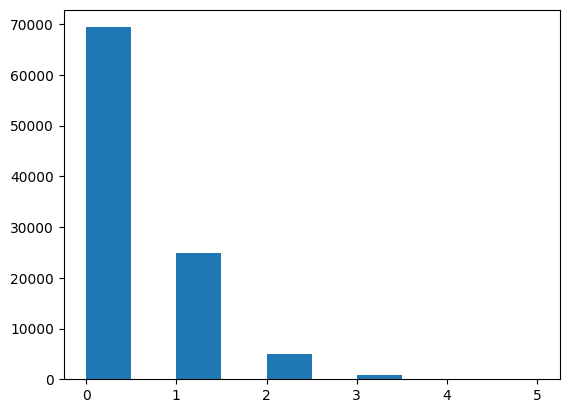

In [150]:
# second day expected number newly infected

plt.hist(second_day_list)

counts_day_2 = Counter(second_day_list)

print(round(sts.mean(map(float, second_day_list)),2))
print(counts_day_2)

1.67
Counter({1: 55135, 2: 29051, 3: 11020, 4: 3493, 5: 970, 6: 267, 7: 53, 8: 9, 9: 2})


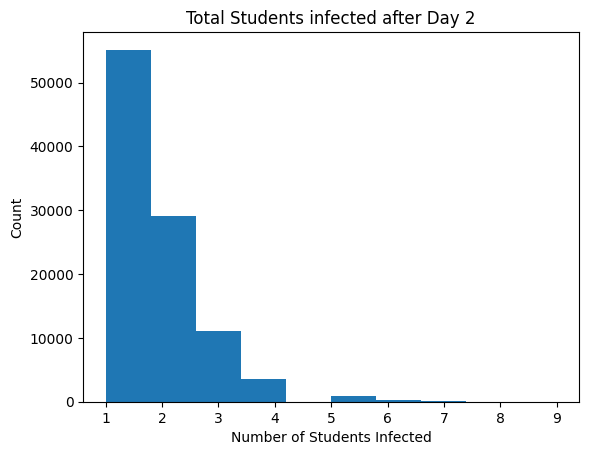

In [151]:
# total infected day 2 (start of day 3)

plt.hist(second_day_total)
plt.title('Total Students infected after Day 2')
plt.ylabel('Count')
plt.xlabel('Number of Students Infected')

counts_day_2_end = Counter(second_day_total)

print(round(sts.mean(map(float, second_day_total)),2))
print(counts_day_2_end)

The average pandemic length with immunizations is: 5.31177
Value: 3, Count: 41137
Value: 8, Count: 14918
Value: 6, Count: 14050
Value: 7, Count: 11069
Value: 5, Count: 7724
Value: 4, Count: 5982
Value: 11, Count: 2481
Value: 14, Count: 1026
Value: 13, Count: 574
Value: 15, Count: 516
Value: 12, Count: 385
Value: 18, Count: 89
Value: 21, Count: 23
Value: 20, Count: 11
Value: 22, Count: 8
Value: 19, Count: 7


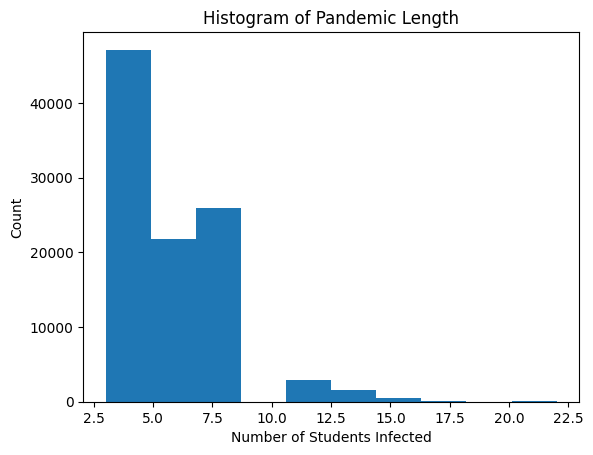

In [152]:
# pandemic length distribution. 3 means no one was infected on days 1, 2, or 3 and Timmy was cured by end of day 3.

plt.hist(pandemic_length)
plt.title('Histogram of Pandemic Length')
plt.ylabel('Count')
plt.xlabel('Number of Students Infected')

average_pandemic_length = np.average(pandemic_length)

print('The average pandemic length with immunizations is:', average_pandemic_length)

counts = Counter(pandemic_length)

sorted_counts = counts.most_common(100)

# Print counts and values
for value, count in sorted_counts:
   print(f"Value: {value}, Count: {count}")

In [153]:
# get longest sublist

longest_list = FindMaxLength(infected_totals)
long_len = longest_list[1]
print(longest_list)

([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0], 23)


In [154]:
# fill in 0s for all sublists to reach the length of the longest sublist

for row in infected_totals:
    while len(row) < long_len:
        row.append(0)

print(infected_totals[:3])

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


0     1.00000
1     1.29738
2     1.67182
3     1.12872
4     1.11353
5     1.00406
6     0.54716
7     0.26497
8     0.05964
9     0.07219
10    0.08671
11    0.04448
12    0.03980
13    0.02528
14    0.00787
15    0.00147
16    0.00163
17    0.00183
18    0.00065
19    0.00058
20    0.00038
21    0.00009
22    0.00000
dtype: float64


Text(0.5, 0, 'School Day')

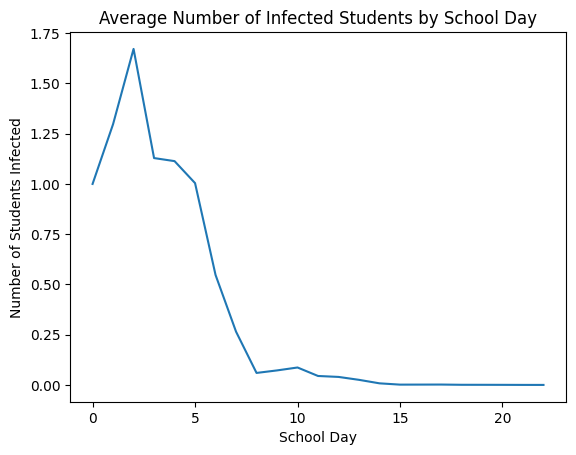

In [155]:
df2 = pd.DataFrame(infected_totals)

# df.head()

expected_number_infected = df2.mean()

print(expected_number_infected)

plt.plot(expected_number_infected)
plt.title('Average Number of Infected Students by School Day')
plt.ylabel('Number of Students Infected')
plt.xlabel('School Day')

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >DEBUG> (5.31177, 2.5692585442302223)
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 7.24585] [loc=5.312 scale=2.569]
[distfit] >DEBUG> (3.0, 2.31177)
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 6.48829] [loc=3.000 scale=2.312]
[distfit] >DEBUG> (27214888.41372924, -62914556.99999997, 62914559.99999996)
[distfit] >INFO> [pareto    ] [0.10 sec] [RSS: 6.48829] [loc=-62914557.000 scale=62914560.000]
[distfit] >DEBUG> (1.4807247679419113, 4.716571385308445, 2.3319475388902733)
[distfit] >INFO> [dweibull  ] [0.69 sec] [RSS: 7.0601] [loc=4.717 scale=2.332]
[distfit] >DEBUG> (8.497531002921654, 5.080507578236627, 2.2214425590491045)
[distfit] >INFO> [t         ] [5.93 sec] [RSS: 7.25977] [loc=5.081 scale=2.221]
[distfit] >DEBUG> (-2.441847155257223, 3.000000000000004, 1.0243004187465576e-14)
[distfit] >INFO> [genextreme] [7.56 sec] [RSS: 7.98] [loc=3.000 scale=0.000]
[distfit] >DEBUG> (0.5003435440036585, 2.999999999999999, 2.263675

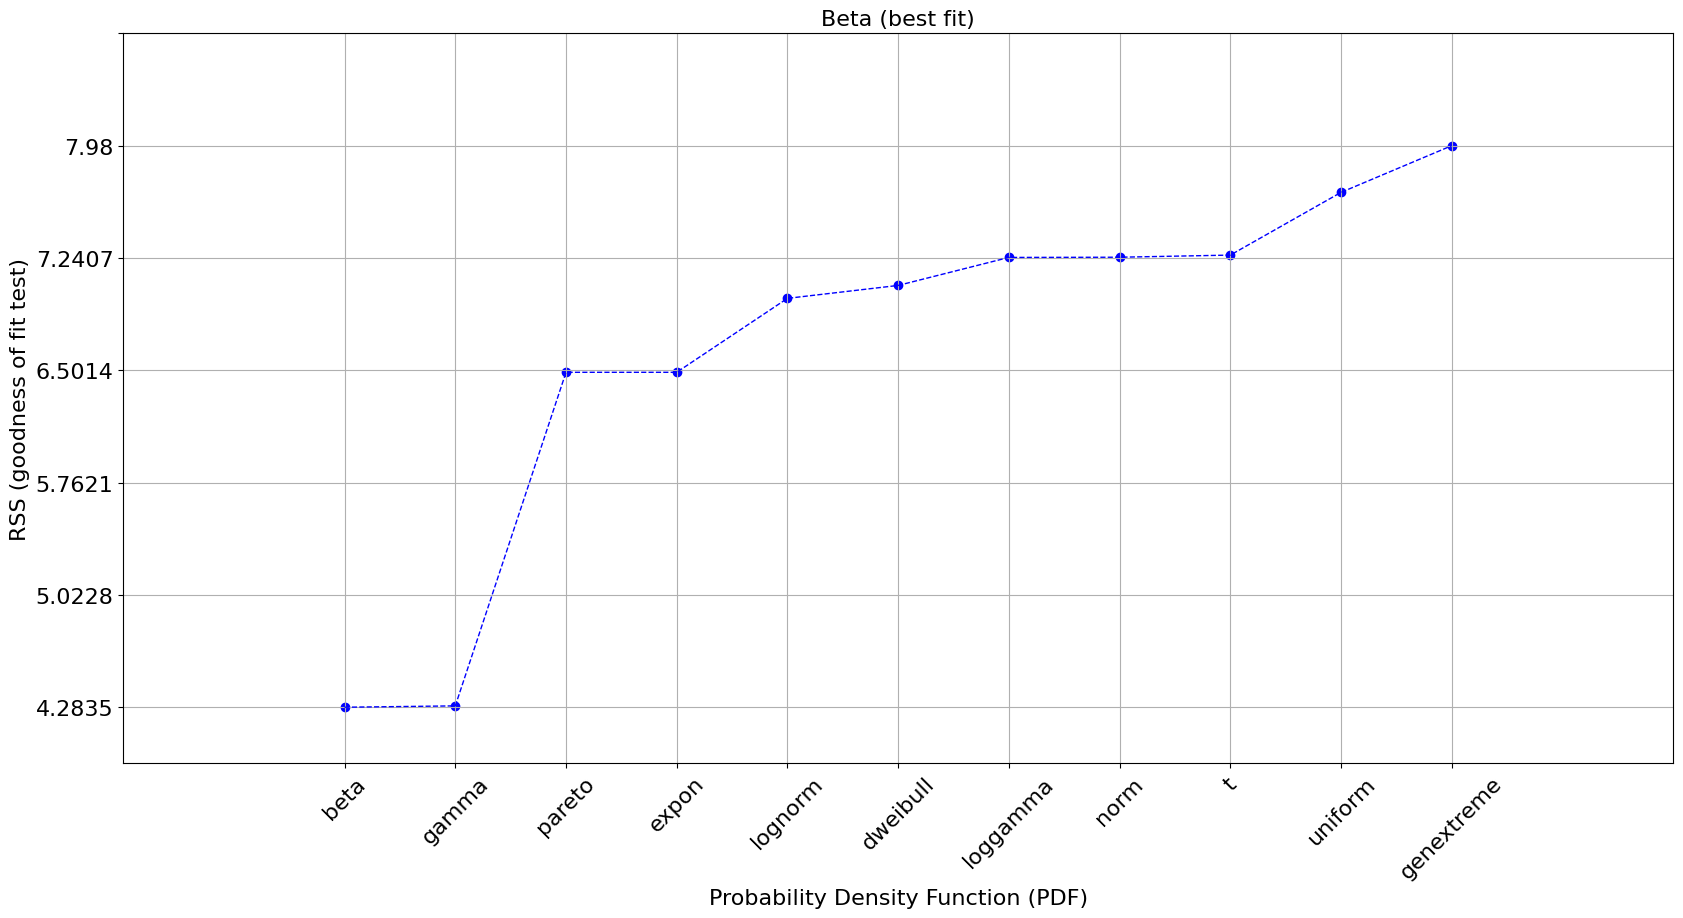

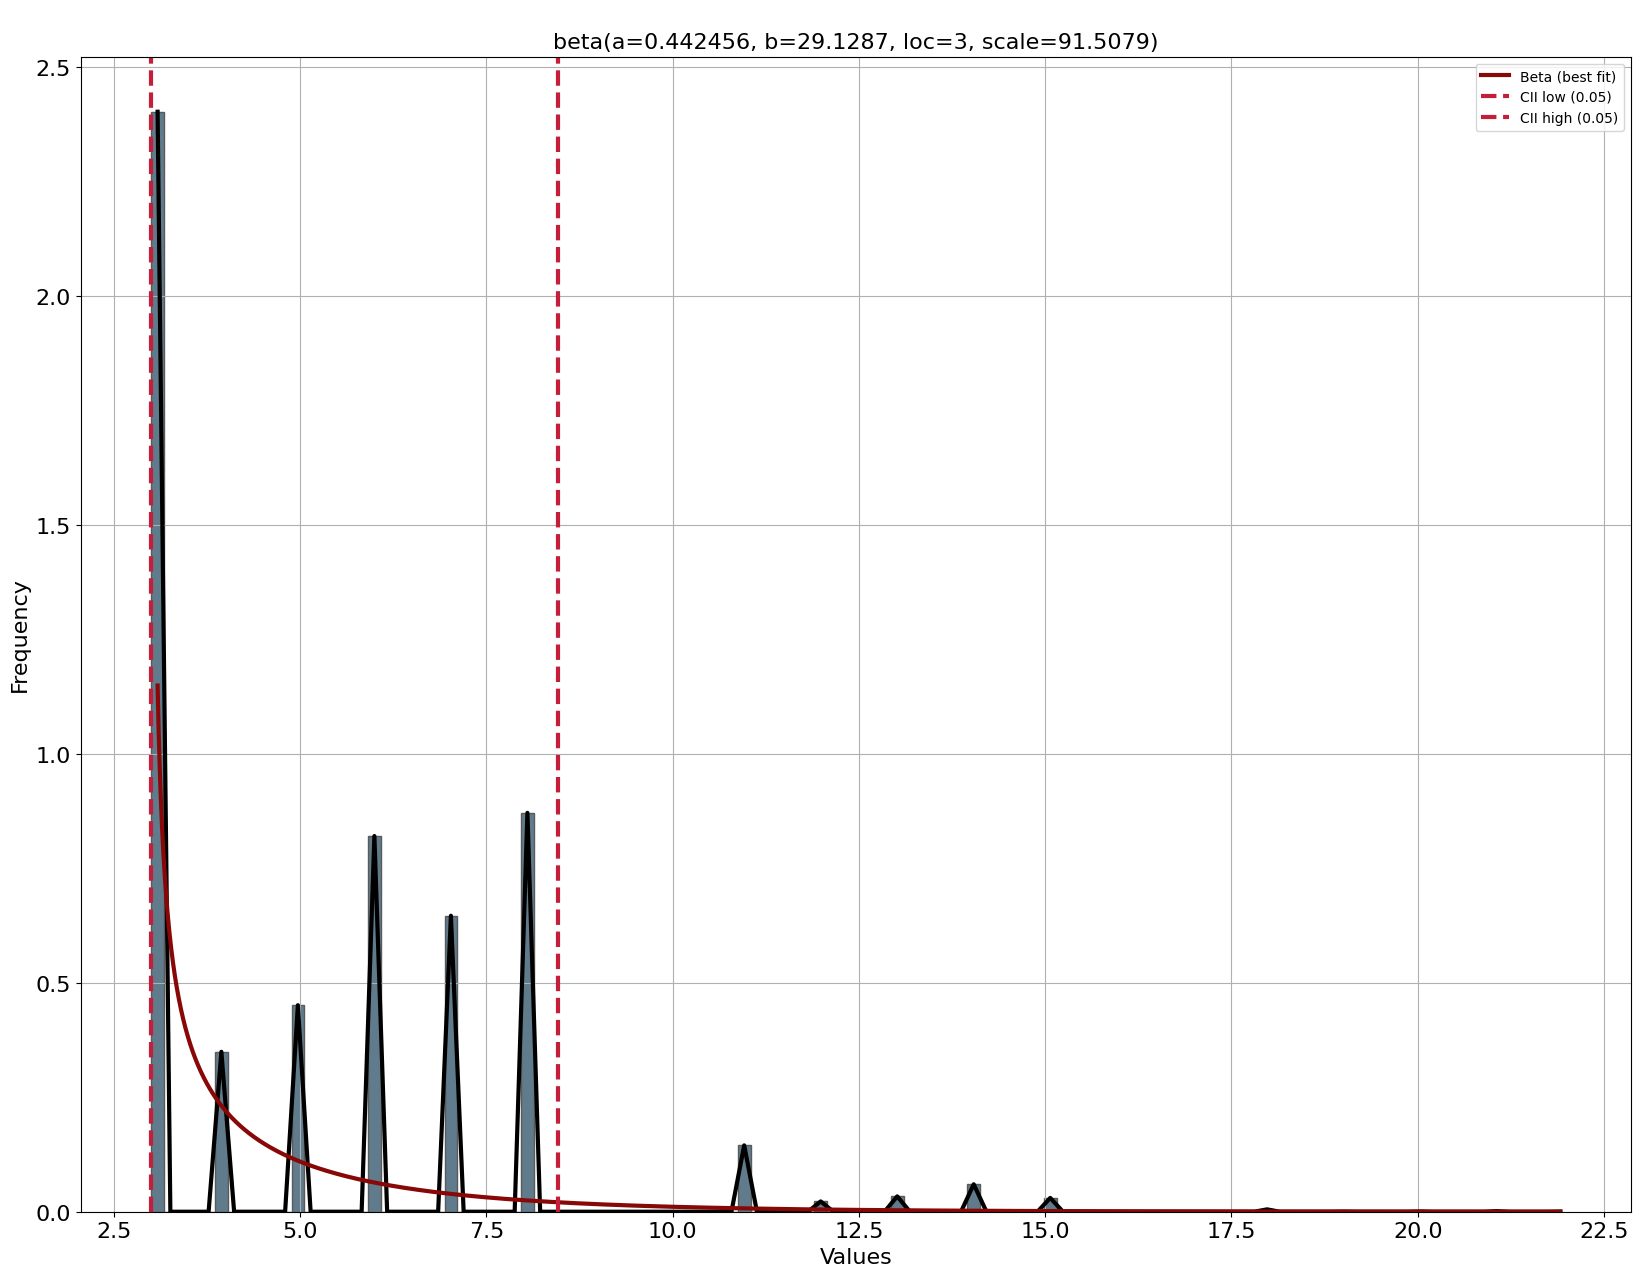

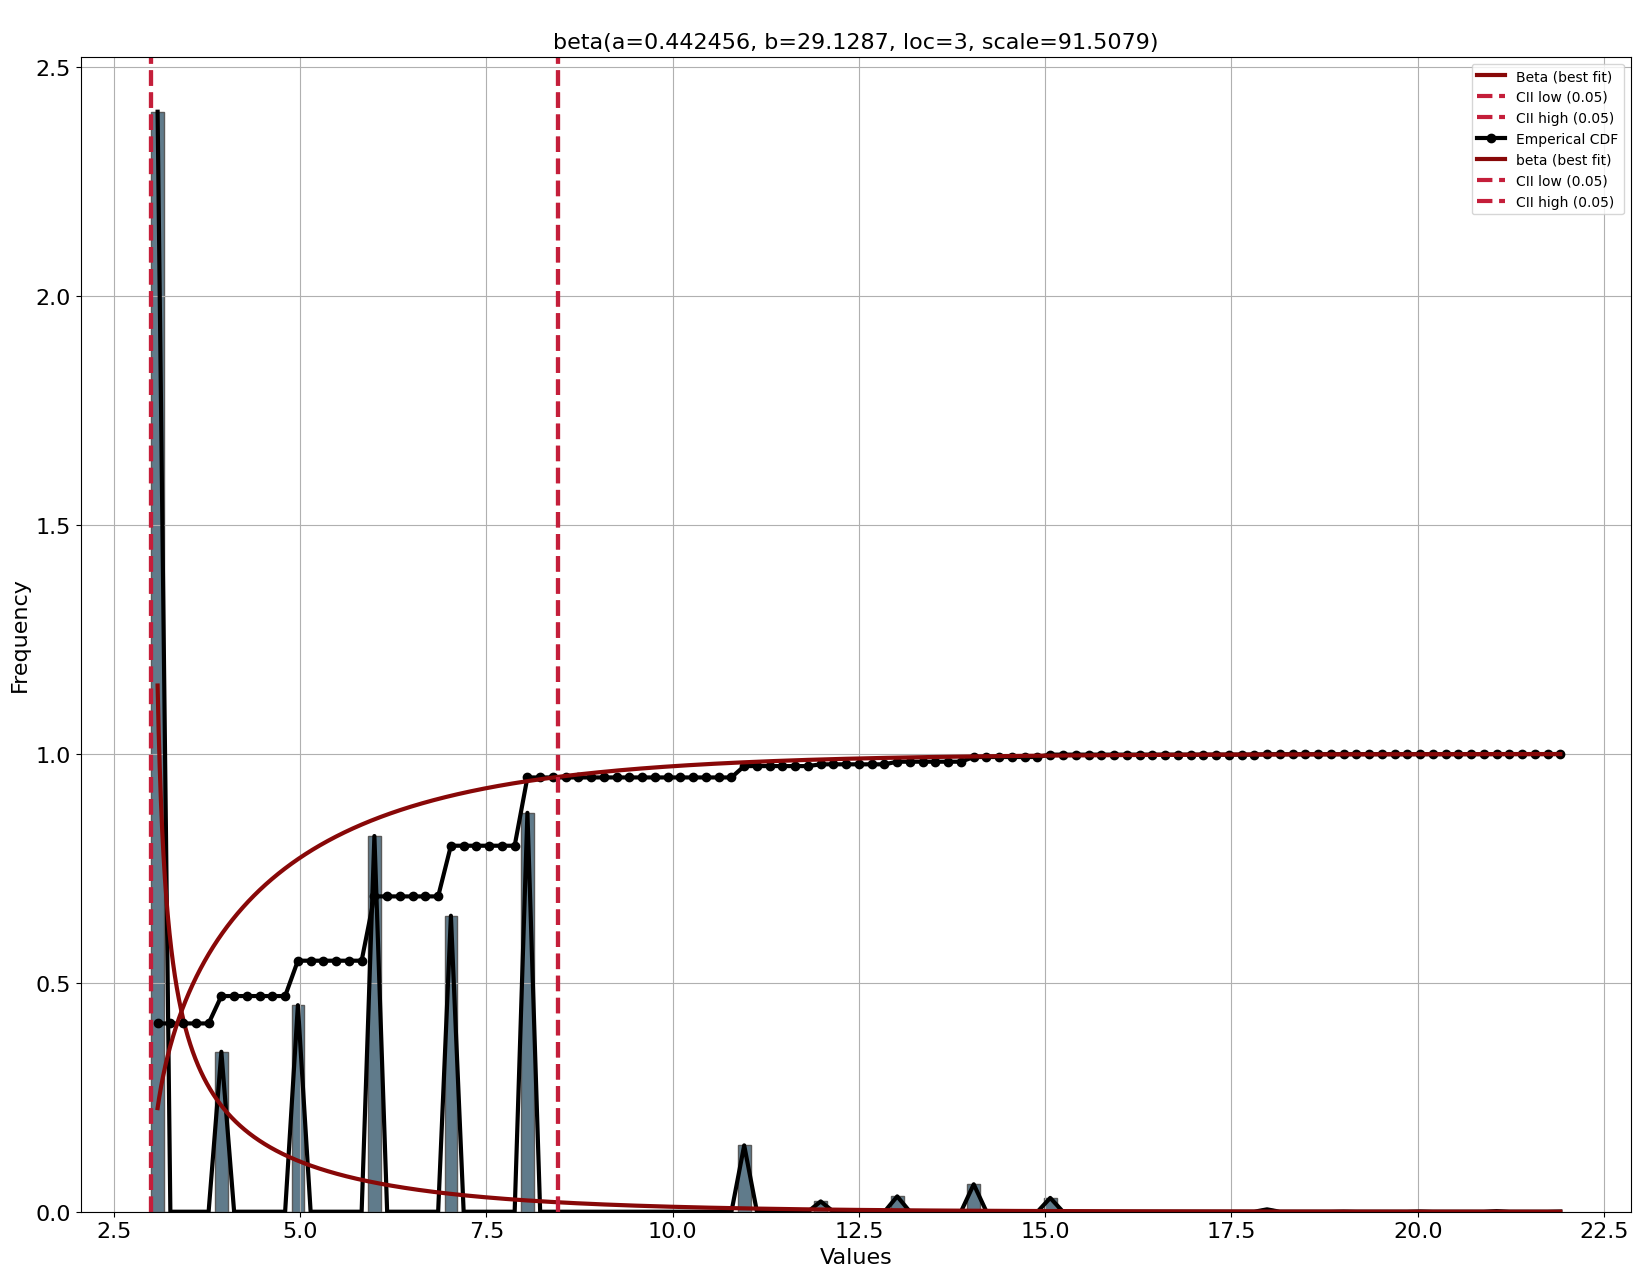

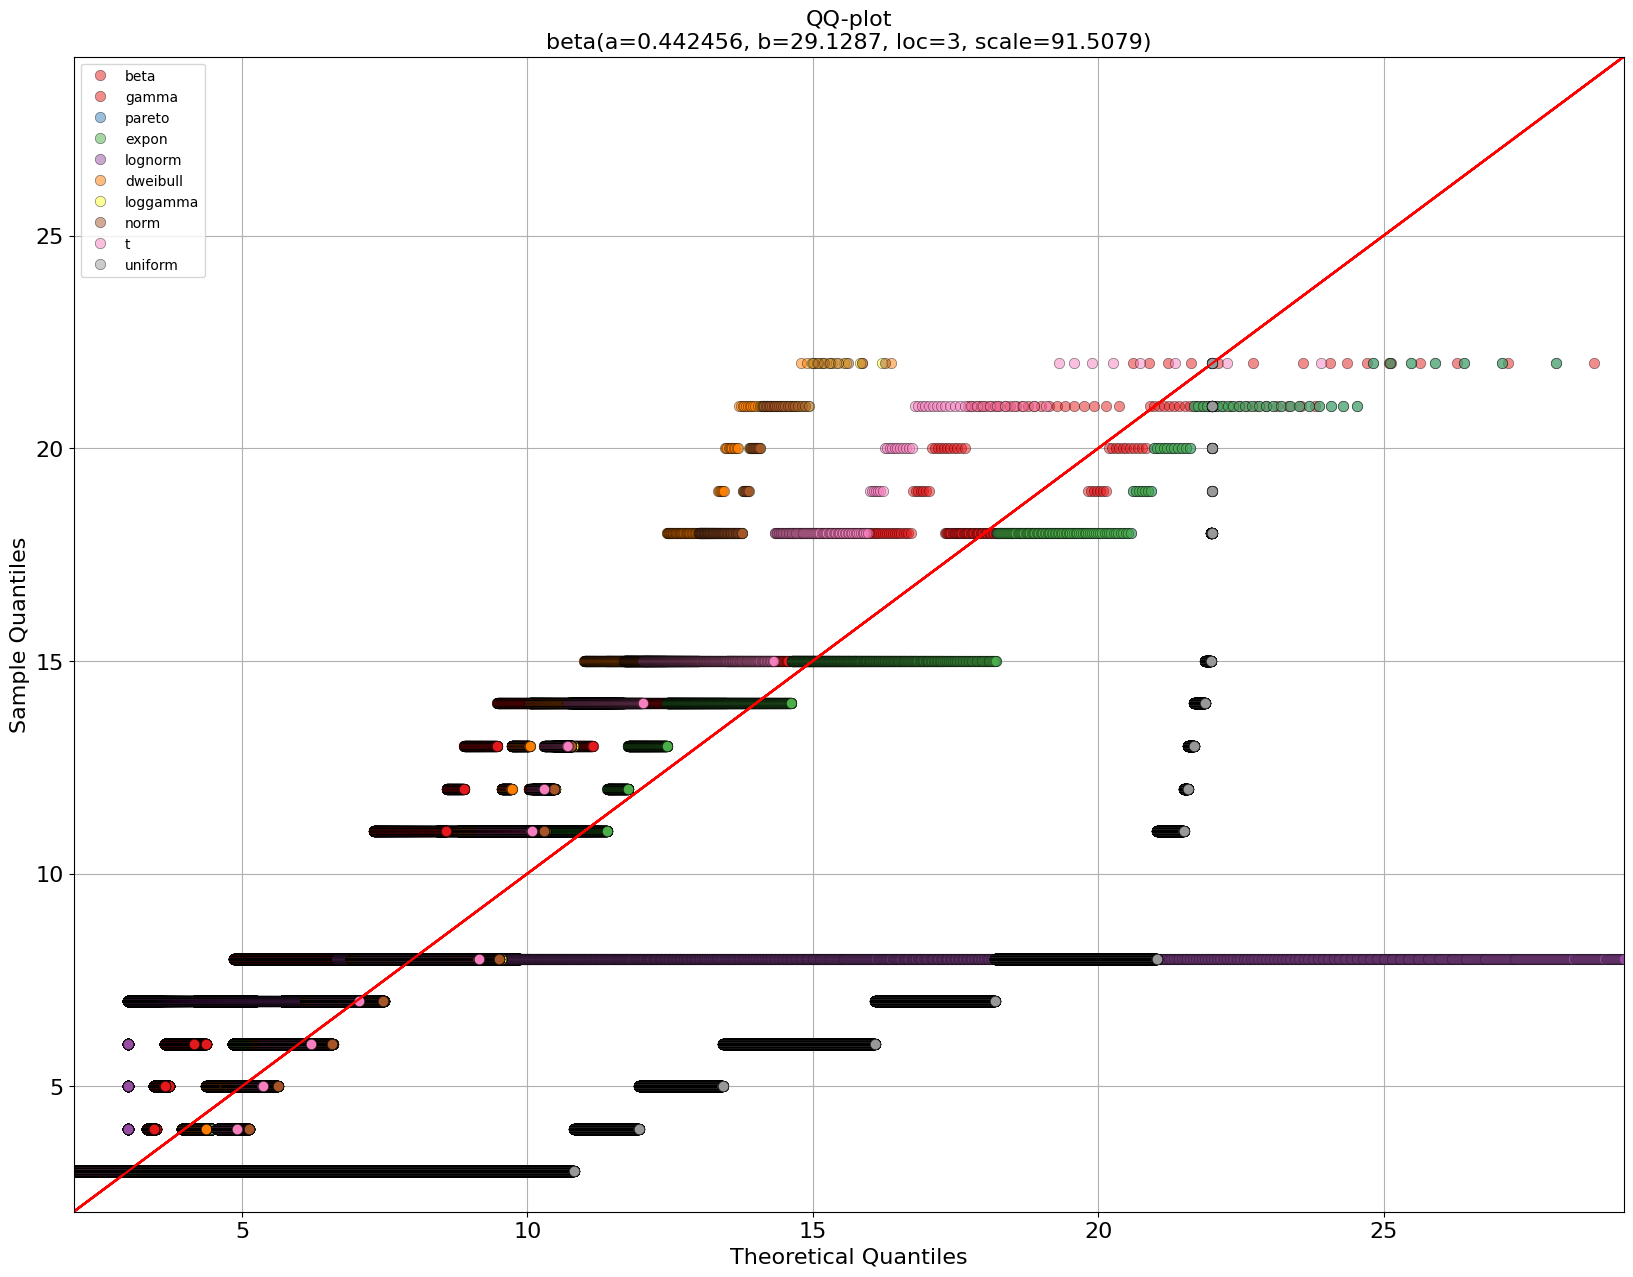

In [156]:
# distfit for 2nd case
dfit = distfit()

results = dfit.fit_transform(np.array(pandemic_length), verbose = 1)

# Plot summary
dfit.plot_summary()

# PDF plot
dfit.plot()

# Plot PDF
fig, ax = dfit.plot(chart='pdf')

# Add the CDF to the plot
fig, ax = dfit.plot(chart='cdf', n_top=1, ax=ax)

# QQ-plot for top 10 fitted distributions
fig, ax = dfit.qqplot(np.array(pandemic_length), n_top=10)

# Simulating Multiple *p* values in the base case

In [157]:
'''
Base case - this time with multiple p values
'''

# define the simulation
def simulate_pandemic(seed,p_infected=0.02):

  # set initial values and params, edit as needed
  total_students = 31
  num_infected_start = [1]
  num_infected_new = []
  num_no_longer_infected_new = [0, 0]
  total_num_no_longer_infected = [0, 0]
  day = 0
  days_infected = 3
  can_get_reinfected = False
  probably_immunized = False
  can_get_infected = True
  num_possible_to_infect = [total_students - num_infected_start[0]]


  # end when no one can be infected
  while num_infected_start[-1] != 0:

    day += 1
    # print(day)

    # update the seed
    seed += day
    np.random.seed(seed)



    # how many are infected to begin with today
    if day > 1:
      num_infected_start.append(num_infected_start[day - 2] + num_infected_new[day - 2] - num_no_longer_infected_new[day - 2])
      # print('num_infected_start')
      # print(num_infected_start)

      # determine who we can infect
      num_possible_to_infect.append(total_students - num_infected_start[day - 1] - total_num_no_longer_infected[day - 2])
      # print('num_possible_to_infect')
      # print(num_possible_to_infect)


    # run this portion during the weekdays
    if 1 <= day % 7 <= 5:

      # infect some new students, muahahahaha
      if num_infected_start[day - 1] < 0:
        print('num_infected_start')
        print(num_infected_start)
        print('num_possible_to_infect')
        print(num_possible_to_infect)
        print('num_infected_new')
        print(num_infected_new)
        print('num_no_longer_infected_new')
        print(num_no_longer_infected_new)
        print('total_num_no_longer_infected')
        print(total_num_no_longer_infected)

      if num_possible_to_infect[day - 1] < 0:
        print('num_infected_start')
        print(num_infected_start)
        print('num_possible_to_infect')
        print(num_possible_to_infect)
        print('num_infected_new')
        print(num_infected_new)
        print('num_no_longer_infected_new')
        print(num_no_longer_infected_new)
        print('total_num_no_longer_infected')
        print(total_num_no_longer_infected)

        print(seed)

      new_infected = np.sum(np.random.binomial(num_infected_start[day - 1], p_infected, num_possible_to_infect[day - 1]) == 1)
      num_infected_new.append(new_infected)
      # print('num_infected_new')
      # print(num_infected_new)


    # run this portion during the weekends
    else:
      num_infected_new.append(0)
      # print('num_infected_new')
      # print(num_infected_new)

    # determine the number no longer infected and update the totals
    if day > 2:
      if day == 3:
        num_no_longer_infected_new.append(num_infected_start[day - 3])
      else:
        num_no_longer_infected_new.append(num_infected_new[day - 4])

      # print('num_no_longer_infected_new')
      # print(num_no_longer_infected_new)

      total_num_no_longer_infected.append(total_num_no_longer_infected[day - 2] + num_no_longer_infected_new[day - 1])
      # print('total_num_no_longer_infected')
      # print(total_num_no_longer_infected)


  return day - 1, num_infected_start, num_infected_new

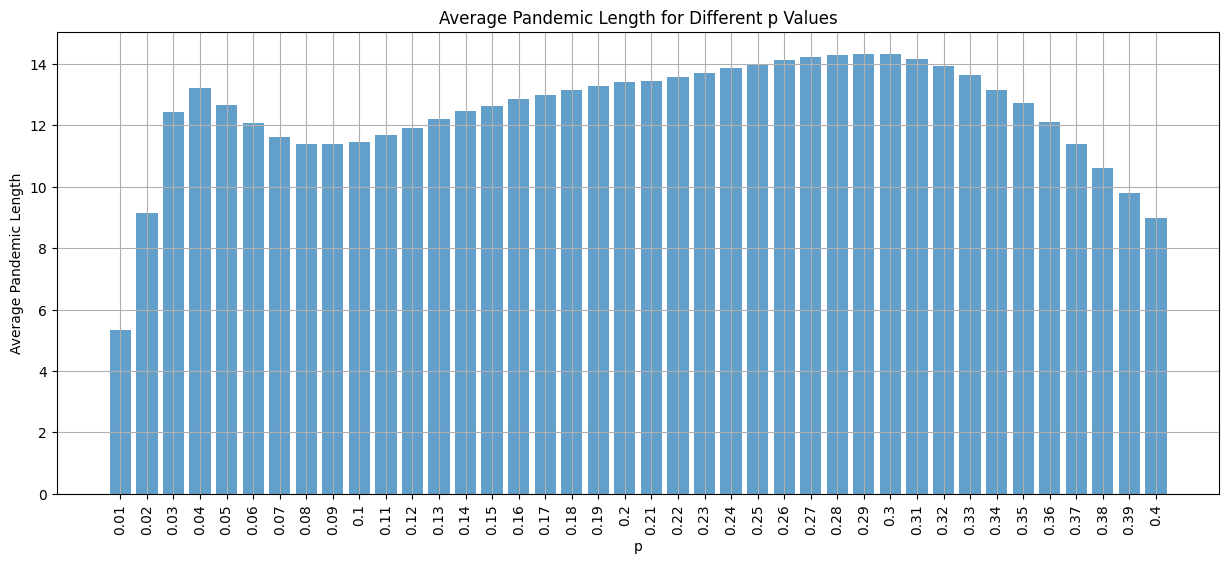

In [158]:
n = 10000
pandemic_lengths = []
different_ps = np.arange(0.01, 0.41, 0.01)
different_ps = np.round(different_ps,2)
data_per_p = {p: [] for p in different_ps}

# Simulating pandemics for different values of p
for p_infected in different_ps:
    for i in range(n):
        seed = i + 123456789 + 1
        run_i = simulate_pandemic(seed, p_infected=p_infected)
        data_per_p[p_infected].append(run_i[0])

# avg lengths
average_lengths = [np.average(data_per_p[p]) for p in different_ps]

# Plotting bar chart with rotated x-axis labels
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(different_ps)), average_lengths, alpha=0.7)
plt.xlabel('p')
plt.ylabel('Average Pandemic Length')
plt.title('Average Pandemic Length for Different p Values')
plt.xticks(np.arange(len(different_ps)), [f"{p}" for p in different_ps], rotation=90)  # Rotate x-axis labels
plt.grid(True)

plt.show()

# General Function: Gives User Ability to Simulate a Disease spread based on several input factors

In [174]:
'''
This function can be applied to any disease - as long as you know the class size,immunization rate,class size, and days infected
(you can simulate multiple values for each)
'''

# define the simulation
def simulate_pandemic_immunized(seed,p_infected = 0.02, total_students=31,probability_immunized=0.5,days_infected=3):

  # set initial values and params, edit as needed
  num_infected_start = [1]
  num_infected_new = []
  day = 0
  can_get_reinfected = False
  can_get_infected = True


  # determine the number of people who are immunized
  num_immunized = np.random.binomial(total_students - num_infected_start[day], probability_immunized)

  num_no_longer_infected_new = [0, 0]
  total_num_no_longer_infected = [num_immunized, num_immunized]
  num_possible_to_infect = [total_students - num_infected_start[day] - num_immunized]


  # end when no one can be infected
  while num_infected_start[-1] != 0:

    day += 1
    # print(day)

    # update the seed
    seed += day
    np.random.seed(seed)



    # how many are infected to begin with today
    if day > 1:
      num_infected_start.append(num_infected_start[day - 2] + num_infected_new[day - 2] - num_no_longer_infected_new[day - 2])
      # print('num_infected_start')
      # print(num_infected_start)

      # determine who we can infect
      num_possible_to_infect.append(total_students - num_infected_start[day - 1] - total_num_no_longer_infected[day - 2])
      # print('num_possible_to_infect')
      # print(num_possible_to_infect)


    # run this portion during the weekdays
    if 1 <= day % 7 <= 5:

      # infect some new students, muahahahaha
      new_infected = np.sum(np.random.binomial(num_infected_start[day - 1], p_infected, num_possible_to_infect[day - 1]) == 1)
      num_infected_new.append(new_infected)
      # print('num_infected_new')
      # print(num_infected_new)


    # run this portion during the weekends
    else:
      num_infected_new.append(0)
      # print('num_infected_new')
      # print(num_infected_new)

    # determine the number no longer infected and update the totals
    if day > 2:
      if day == 3:
        num_no_longer_infected_new.append(num_infected_start[day - 3])
      else:
        num_no_longer_infected_new.append(num_infected_new[day - 4])

      # print('num_no_longer_infected_new')
      # print(num_no_longer_infected_new)

      total_num_no_longer_infected.append(total_num_no_longer_infected[day - 2] + num_no_longer_infected_new[day - 1])
      # print('total_num_no_longer_infected')
      # print(total_num_no_longer_infected)


  return day - 1, num_infected_start, num_infected_new,num_immunized

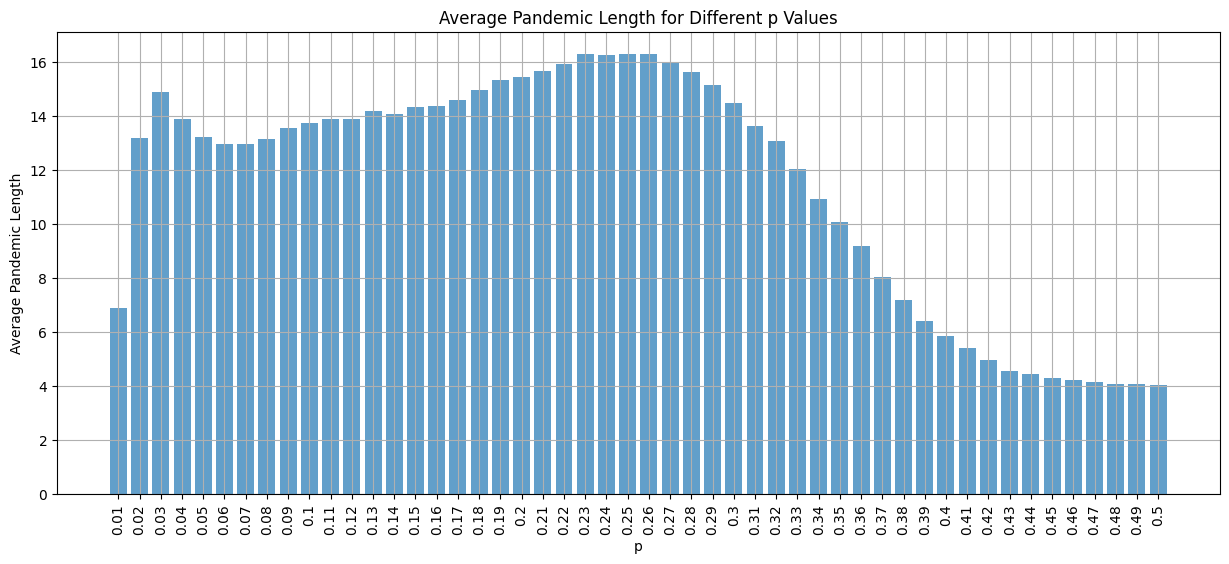

In [164]:
n = 1000
pandemic_lengths = []
different_ps = np.arange(0.01, 0.51, 0.01)
different_ps = np.round(different_ps,2)
data_per_p = {p: [] for p in different_ps}

# Simulating pandemics for different values of p
for p_infected in different_ps:
    for i in range(n):
        seed = i + 123456789 + 1
        run_i = simulate_pandemic_immunized(seed,p_infected = p_infected, total_students=60,probability_immunized=0.3,days_infected=5)
        data_per_p[p_infected].append(run_i[0])

# avg lengths
average_lengths = [np.average(data_per_p[p]) for p in different_ps]

# Plotting bar chart with rotated x-axis labels
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(different_ps)), average_lengths, alpha=0.7)
plt.xlabel('p')
plt.ylabel('Average Pandemic Length')
plt.title('Average Pandemic Length for Different p Values')
plt.xticks(np.arange(len(different_ps)), [f"{p}" for p in different_ps], rotation=90)  # Rotate x-axis labels
plt.grid(True)

plt.show()

In [172]:
# run a bunch of times
n = 100000
pandemic_length = []
second_day_list = []
first_day_list = []
second_day_total = []
infected_totals = []
num_immunized_ls = []

for i in range(n):
  seed = i+123456789+1
  run_i = simulate_pandemic_immunized(seed,p_infected = 0.04, total_students=200,probability_immunized=0.07,days_infected=4)
  pandemic_length.append(run_i[0])
  second_day_list.append(run_i[2][1])
  first_day_list.append(run_i[2][0])
  second_day_total.append(run_i[1][2])
  infected_totals.append(run_i[1])
  num_immunized_ls.append(run_i[3])

[[1, 5, 35, 86, 87, 64, 12, 7, 25, 48, 55, 37, 19, 12, 5, 5, 8, 13, 11, 11, 6, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 11, 53, 97, 100, 61, 16, 3, 9, 35, 51, 48, 26, 10, 4, 3, 3, 4, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 8, 56, 86, 86, 49, 18, 11, 23, 45, 50, 33, 21, 16, 10, 5, 5, 5, 4, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
0      1.00000
1      8.39885
2     51.16114
3     86.37835
4     89.63004
5     55.45295
6     19.23574
7      8.58520
8     19.15626
9     39.87423
10    52.73889
11    40.49155
12    26.09965
13    13.23499
14     6.32607
15     2.62224
16     3.60720
17     4.72763
18     3.26876
19     2.97849
20     1.85806
21     0.69469
22     0.15216
23     0.18590
24     0.22543
25     0.11685
26     0.10443
27     0.06490
28     0.02132
29     0.00381
30     0.00450
31     0.00537
32     0.00234
33     0.00204
34     0.00117
35     0.00039
36     0.00005
37     0.00007
38    

Text(0.5, 0, 'School Day')

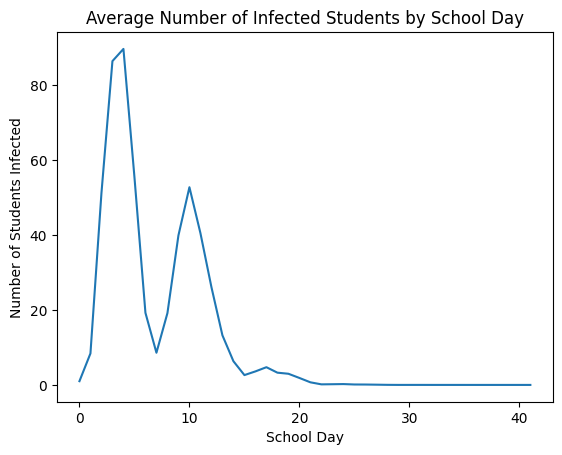

In [173]:
# get longest sublist

longest_list = FindMaxLength(infected_totals)
long_len = longest_list[1]

# create list of expected infected on a given day, remember that first index value is day 0
# fill in 0s for all sublists to reach the length of the longest sublist

for row in infected_totals:
    while len(row) < long_len:
        row.append(0)

print(infected_totals[:3])
df2 = pd.DataFrame(infected_totals)

# df.head()

expected_number_infected = df2.mean()

print(expected_number_infected)

plt.plot(expected_number_infected)
plt.title('Average Number of Infected Students by School Day')
plt.ylabel('Number of Students Infected')
plt.xlabel('School Day')